# Location Finding Notebook

#### Use this notebook to find location using haversine formula

In [2]:
import tools
import numpy as np
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import cartopy.crs as ccrs

In [11]:
lat1 = -78 #SPA
lat2 = -35
long1= 0 #SPA
long2 = -5


distance, bearing = tools.haversine_moon(lat1, long1, lat2, long2)   


#spa actual -53 lat (south) , -169 long (west)

In [12]:
print(distance)

1315.0223968335843


In [13]:
print(bearing)

-0.10476834112804448


In [14]:
bearing_deg = np.rad2deg(bearing)+18.8 #add tilt

print(bearing_deg)

12.79721622677617


In [15]:
land_lat, land_long = tools.track(-53, -169, bearing_deg, distance)

In [16]:
land_long = land_long 
print(land_long)


-160.15208011017234


In [17]:
print(land_lat) 

-10.539790087287244


In [18]:
def plot():
    
    fig = plt.figure(figsize=[16, 20])
    plt.tight_layout()
    ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.Mollweide())

    fig.subplots_adjust(bottom=0.05, top=0.95,
                        left=0.04, right=0.95, wspace=0.02)


    ax1.set_extent([-90, 90, 0, 90], ccrs.PlateCarree())
    ax1.gridlines()
    ax1.set_global()

   
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)


    plot = ax1.scatter(land_long, land_lat, marker = 'x', s = 200, c='r', transform =  ccrs.PlateCarree())
    

    ax1.gridlines(draw_labels = True)
    
    plt.show()
    

    


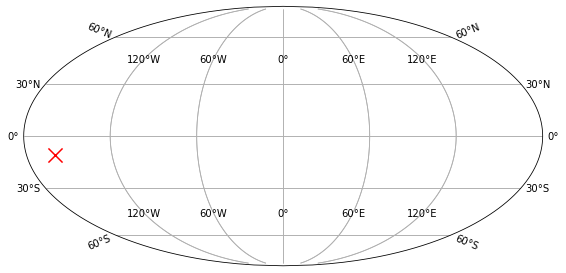

In [19]:
plot()